<a href="https://colab.research.google.com/github/vilaparthibhaskar/IT7103/blob/main/Group17_courseproject_PDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group-17


# U.S. Adult Income Dataset

###  Data/Preliminary Analysis

In [ ]:

import numpy as np
import pandas as pd
from collections import Counter
from google.colab import drive
drive.mount('/content/drive')

# Loading data_set
adult_income = pd.read_csv('/content/drive/MyDrive/PDA/adult.data')
adult_income.columns =['Age', 'Workclass', 'fnlwgt', 'education', 'education num', 'martial status', 'occupation', 'relationship', 'race', 'sex', 'capital gain', 'capital loss', 'hours-per-week', 'native country', 'income']
# replacing ? as null
hold = adult_income['Workclass'][26]
adult_income.replace(hold, pd.NA, inplace=True)

print(adult_income.info())
print("\n")
print(adult_income.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education num   32560 non-null  int64 
 5   martial status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital gain    32560 non-null  int64 
 11  capital loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(

In [ ]:
# checking missing values
print("Checking missing values:\n")
for column in adult_income.columns:
    if adult_income[column].isnull().sum() != 0:
        mis_val = adult_income[column].isnull().sum()
        per = mis_val / len(adult_income[column]) * 100
        dtype = adult_income[column].dtype
        print(f"The column: '{column}' with Data Type: '{dtype}' has missing value: {mis_val}, percentage: {per:.2f}%")

# cleaning the memory
del mis_val
del per
del dtype

Checking missing values:

The column: 'Workclass' with Data Type: 'object' has missing value: 1836, percentage: 5.64%
The column: 'occupation' with Data Type: 'object' has missing value: 1843, percentage: 5.66%
The column: 'native country' with Data Type: 'object' has missing value: 583, percentage: 1.79%


In [ ]:
# check the label class and it's distribution percentage
label = adult_income.values[:, -1]
counter = Counter(label)
for key, val in counter.items():
    per = val / len(label) * 100
    print(f"Class: {key}, Count = {val}, Percentage = {per:.1f}%.")

Class:  <=50K, Count = 24719, Percentage = 75.9%.
Class:  >50K, Count = 7841, Percentage = 24.1%.


In [ ]:
num = adult_income.select_dtypes(include=['int64', 'float64'])

In [ ]:
print(num)

       Age  fnlwgt  education num  capital gain  capital loss  hours-per-week
0       50   83311             13             0             0              13
1       38  215646              9             0             0              40
2       53  234721              7             0             0              40
3       28  338409             13             0             0              40
4       37  284582             14             0             0              40
...    ...     ...            ...           ...           ...             ...
32555   27  257302             12             0             0              38
32556   40  154374              9             0             0              40
32557   58  151910              9             0             0              40
32558   22  201490              9             0             0              20
32559   52  287927              9         15024             0              40

[32560 rows x 6 columns]


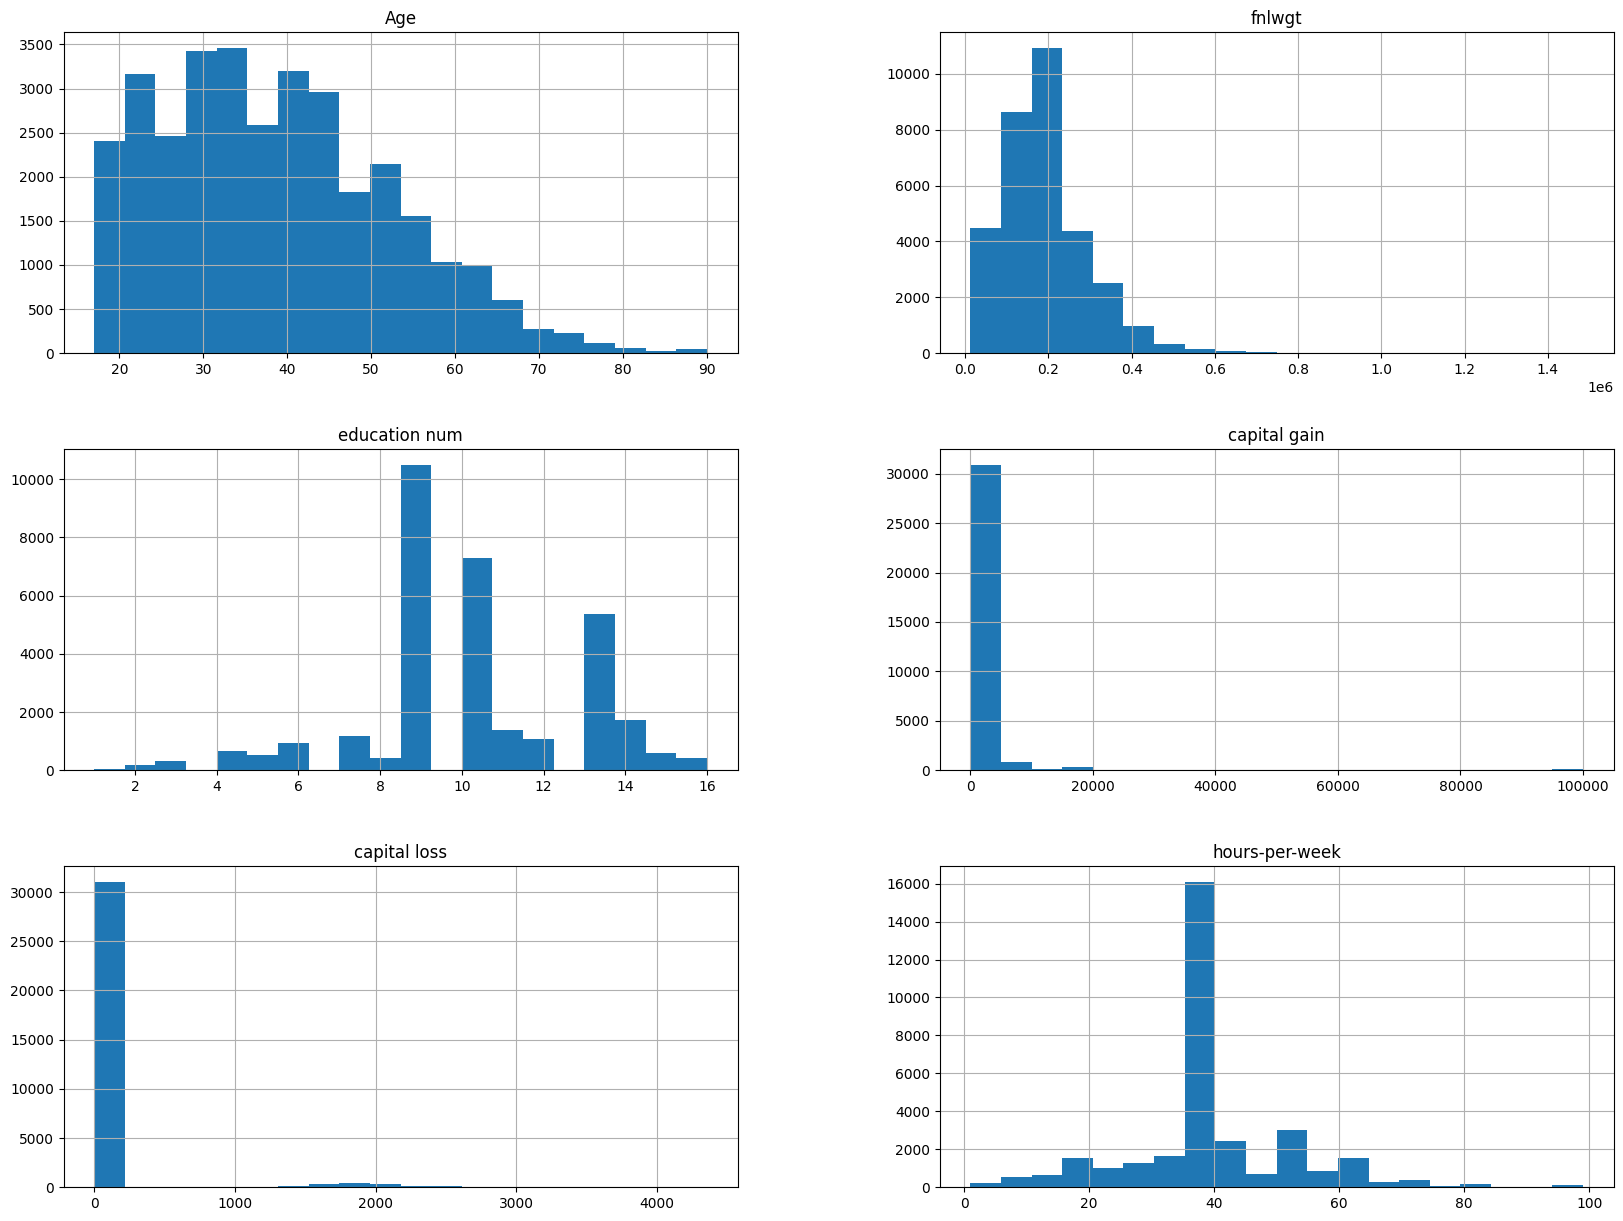

In [ ]:
import matplotlib.pyplot as plt
num.hist(bins=20, figsize=(20, 15))
plt.show()

### Data Preprocessing

In [ ]:
adult_income = adult_income.fillna(adult_income.mode().iloc[0])
print(adult_income.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education num   32560 non-null  int64 
 5   martial status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital gain    32560 non-null  int64 
 11  capital loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
# checking any outliers are present
print(num.describe())

                Age        fnlwgt  education num  capital gain  capital loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
# checking the quantity of the outliers
print(f"There are {adult_income[adult_income['capital gain'] == 99999].shape[0]} outliers in capital gain column")
print(f"There are {adult_income[adult_income['hours-per-week'] == 99].shape[0]} outliers in hours-per-week column")

There are 159 outliers in capital gain column
There are 85 outliers in hours-per-week column


In [ ]:
# replacing the outliers with mean values
adult_income['capital gain'].replace(99999, np.mean(adult_income['capital gain'].values), inplace=True)
adult_income['hours-per-week'].replace(99, np.mean(adult_income['hours-per-week'].values), inplace=True)
print(adult_income.describe())

                Age        fnlwgt  education num  capital gain  capital loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590    594.553127     87.306511   
std       13.640642  1.055498e+05       2.572709   2554.248860    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  41310.000000   4356.000000   

       hours-per-week  
count    32560.000000  
mean        40.284588  
std         11.978602  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         98.000000  


In [ ]:
adult_income.to_csv('/adult_preprocessed.csv', index=False)

### Modeling and Result

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


def Loading(name):
    df = pd.read_csv(name)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    cate_index = X.select_dtypes(include=['object']).columns
    num_index = X.select_dtypes(include=['int64', 'float64']).columns
    y = LabelEncoder().fit_transform(y)

    return X, y, cate_index, num_index

def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    return scores

In [ ]:
from sklearn.dummy import DummyClassifier

X, y, cate_index, num_index = Loading('/adult_preprocessed.csv')
model = DummyClassifier(strategy='most_frequent')

In [ ]:
scores = evaluate_model(X, y, model)
print(scores)

[0.75921376 0.75921376 0.75921376 0.75921376 0.75921376 0.75921376
 0.75921376 0.75921376 0.75921376 0.75890663 0.75921376 0.75921376
 0.75921376 0.75921376 0.75921376 0.75921376 0.75921376 0.75921376
 0.75921376 0.75890663 0.75921376 0.75921376 0.75921376 0.75921376
 0.75921376 0.75921376 0.75921376 0.75921376 0.75921376 0.75890663]


In [ ]:
print(f"The mean accuracy of Dummy Classifier is  {(np.mean(scores)*100):.2f}%, with Standard Deviation: {np.std(scores):.2f}")

The mean accuracy of Dummy Classifier is  75.92%, with Standard Deviation: 0.00


### Model Evaluate and Fine Tune

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

def load_dataset(filename):
    df = pd.read_csv(filename)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    cate_index = X.select_dtypes(include=['object']).columns
    num_index = X.select_dtypes(include=['int64', 'float64']).columns
    y = LabelEncoder().fit_transform(y)
    return X, y, cate_index, num_index

X, y, cate_index, num_index = load_dataset('/adult_cleaned.csv')
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(32560, 14)
<class 'numpy.ndarray'>
(32560,)


In [ ]:
steps = [('Categorical', OneHotEncoder(handle_unknown='ignore'), cate_index), ('Numerical', MinMaxScaler(), num_index)]

from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(steps, verbose=True)
X = transformer.fit_transform(X)

print(type(X))
print(X.shape)

[ColumnTransformer] ... (1 of 2) Processing Categorical, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing Numerical, total=   0.0s
<class 'scipy.sparse._csr.csr_matrix'>
(32560, 105)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 105)
(9768, 105)
(22792,)
(9768,)


In [ ]:
# filter unwanted warning
import warnings
warnings.filterwarnings('ignore')


Evaluating DecisionTree without Tuning

In [ ]:
scores = evaluate_model(X_train, y_train, DecisionTreeClassifier())
print(f"The decisiontree model average accuracy is: {(np.mean(scores)*100):.2f}%, with Standard Deviation: {(np.std(scores)*100):.2f}.")

The decisiontree model average accuracy is: 81.00%, with Standard Deviation: 0.72.


Evaluating BaggingClassifier without Tuning

In [ ]:
scores = evaluate_model(X_train[:10000], y_train[:10000], BaggingClassifier(n_estimators=100))
print(f"The baggingclassifier model average accuracy is: {(np.mean(scores)*100):.2f}%, with Standard Deviation: {(np.std(scores)*100):.2f}.")

The baggingclassifier model average accuracy is: 84.85%, with Standard Deviation: 0.95.


Evaluating RandomForestClassifier without Tuning

In [ ]:
scores = evaluate_model(X_train, y_train, RandomForestClassifier(n_estimators=100))
print(f"The random_tree_classifier model average accuracy is: {(np.mean(scores)*100):.2f}%, with Standard Deviation: {(np.std(scores)*100):.2f}.")

The random_tree_classifier model average accuracy is: 84.94%, with Standard Deviation: 0.49.


Evaluating GradientBoostingClassifier without Tuning

In [ ]:
scores = evaluate_model(X_train, y_train, GradientBoostingClassifier(n_estimators=100))
print(f"The GBM model average accuracy is: {(np.mean(scores)*100):.2f}%, with Standard Deviation: {(np.std(scores)*100):.2f}.")

The GBM model average accuracy is: 86.31%, with Standard Deviation: 0.60.


In [ ]:
# fine tune BaggingClassifier

from sklearn.model_selection import GridSearchCV

BAGgrid = {'n_estimators': [100, 200]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
BAGclf = BaggingClassifier()
BAGgrid_search = GridSearchCV(estimator=BAGclf, param_grid=BAGgrid, n_jobs=-1, cv=cv,
                              scoring='accuracy', error_score=0)
BAGgrid_result = BAGgrid_search.fit(X_train[:10000], y_train[:10000])

In [ ]:
print(BAGgrid_result.best_score_)
print(BAGgrid_result.best_params_)

0.8505499999999999
{'n_estimators': 100}


In [ ]:
# fine tune GradientBoostingClassifier

GBMgrid = {'n_estimators': [100, 200]}
GBMclf = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,
                                    max_depth=8, max_features='sqrt', subsample=0.8, random_state=42)
GBMgrid_search = GridSearchCV(estimator=GBMclf, param_grid=GBMgrid, n_jobs=-1, cv=cv,
                              scoring='accuracy', error_score=0)
GBMgrid_result = GBMgrid_search.fit(X_train, y_train)

In [ ]:
print(GBMgrid_result.best_score_)
print(GBMgrid_result.best_params_)

0.8670585433381319
{'n_estimators': 200}


In [ ]:
# fine tune Decision Tree
param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200]
}]
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)
result = grid_search.fit(X_train, y_train)


In [ ]:
print(result.best_score_)
print(result.best_params_)

0.8322668679892061
{'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 25, 'min_samples_split': 100}


In [ ]:
# fine tune Random forest
param_grid = [{
    'max_depth': [2, 3],
    'max_features' : [5, 10],
    'min_samples_split' : [25, 50],
    'min_samples_leaf' : [25, 50],
    'n_estimators': [5, 10, 20]
}]
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', return_train_score=True)
result = grid_search.fit(X_train, y_train)

In [ ]:
print(result.best_score_)
print(result.best_params_)

0.8131805210818405
{'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 5}


Well, seems like if the `n_estimators` is equal to 200, the GradientBoostingClassifier performance incrase to `86.69%`, then we can update our hyperparameter for GradientBoostingClassfier and train it according to our Training Subset, now we have the winner, is GradientBoostingClassifier algorithm.

### Final: Train the best model

In [ ]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,
                                   max_depth=8, max_features='sqrt', subsample=0.8, random_state=42)

model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=200, random_state=42, subsample=0.8)

In [ ]:
# evaluate the testing subset
TestScore = model.score(X_test, y_test)
print(f"The model test_set accuracy is: {(TestScore*100):.1f}%.")

The model test set accuracy is: 86.9%.


In [ ]:
# perform the Classification Report
from sklearn.metrics import classification_report

predicted = model.predict(X_test)
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7416
           1       0.78      0.64      0.70      2352

    accuracy                           0.87      9768
   macro avg       0.84      0.79      0.81      9768
weighted avg       0.86      0.87      0.86      9768

